<a href="https://colab.research.google.com/github/sofialabrab/ADA-informes/blob/main/Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Algoritmo Select**#

El algoritmo Select está relacionado con la reducción de problemas, es decir, **transformación de un problema a otro problema**. De un problema $A$ que diremos que es el problema mayor, lo reduciremos a resolver un problema $B$, de manera, que al resolver este nuevo problema sea de una forma más sencilla resolver el problema original o mayor, esto lo veremos demostrado mas adelante. Este algoritmo también se relaciona con los problemas de selección, donde estos contienen una entrada compuesta por un conjunto de números de diferentes $A$ más un índice i y su salida es un elemento "**x**" perteneciente a $A$, que será mayor  a exactamente $i-1$ elementos de $A$. Este elemento "x", se conoce como estadístico de orden $i$-ésimo para el conjunto $A$. 

**¿Que es un estadístico de orden?**

Según la Estadística, que es la rama que estudia este tema, un ***estadístico de orden*** es aquel **k-ésimo valor más pequeño** de una muestra estadística. 
De aquí viene la relación con el **algoritmo select**, dado que este busca **encontrar este estadístico de orden.**


##**Pasos del Algoritmo**##

Si queremos encontrar el k-ésimo elemento valor más pequeño en un conjunto de datos, utilizando el algoritmo Select, seguiremos los siguientes pasos:



> Primero identificamos nuestro objetivo y datos iniciales:

**Problema**: Encontrar el 3° valor más pequeño dentro del arreglo

**Entrada**: Arreglo inicial = [6, 3, 1, 8, 4, 9, 5, 11]

**Tamaño del problema**: 8 elementos, distribuidos entre las posiciones 0 y 7.

**Salida Esperada** : El 3° valor más pequeño : 4



###**¿Que hace cada función?**###



> $Insertion Sort:$ Se encarga del ordenamiento de datos.


> $Partition:$ Se encarga de dividir el arreglo en base a el pivote escogido



> $pivotSelection:$ Su función principal es **encontrar la mediana**, tiene 3 casos:

*1.-* Caso base, largo del arreglo es 1, se retorna ese mismo arreglo.

*2.-* El largo del arreglo <=5, se busca la mediana de ese subarreglo y se retorna esta misma.
*3.-* En el caso que el largo del arreglo sea mayor a 5, se subdivide este arreglo, en subarreglos de 5 elementos, se busca la mediana de cada subarreglo creado y estas se guardan en un nuevo **arreglo de medianas**.Luego, se vuelve a llamar esta función(recursiva) enviandole ahora el nuevo arreglo de medianas creado, y así sucesivamente hasta encontrarnos con el primer o segundo caso.






> $Select:$ Esta función es la primera en llamarse y su primer paso es llamar a pivotSelection con el arreglo original, donde en esa función este se ordenará gracias a Insertion Sort y asi sucesivamente cada vez que entremos a la función Select en las llamadas recursivas trabajaremos con **subarreglos ordenados**.

Se divide en 3 casos importantes:

*1.-* **k == q**, de ser así se retorna la mediana que nos entrega pivotSelection, la cual será el **k-ésimo elemento más pequeño**

*2.-* **k < q**, volvemos a llamar a la función select, para que traspase a pivotSelection el arreglo con los elementos desde el inicio hasta k - 1, es decir, que trabaje con la parte izquierda del arreglo para buscar la mediana.

*3.-* El contrario a caso 2, **k > q**, se vuelve a llamar la función para que pivotSelection trabaje con el lado derecho del arreglo, desde q hasta el final.



















In [129]:
def insertionSort(arreglo, cont):
  
  for i in range(1, len(arreglo)):
   
    elem = arreglo[i] #Variable que guarda el elemento en la posicion de la fila
    j = i
   
    #Si los elementos están desordenados y existe un predecesor entran al ciclo
    while(j > 0 and arreglo[j - 1] > elem):
      cont[0]+=1
      #Intercambio de posiciones entre los elementos
      arreglo[j], arreglo[j - 1]= arreglo[j - 1], arreglo[j]
      j = j - 1

  return arreglo      



def partition(arreglo, pivote, cont):
  cont[0]+=1
  posPivote = arreglo.index(pivote)
  if(pivote != 0):
    #intercambio
    arreglo[0], arreglo[posPivote] = arreglo[posPivote], arreglo[0]
  largo = len(arreglo)
  j = 1
  for i in range(1, largo)  : 
    cont[0]+=1
    if(arreglo[i] < arreglo[0]):
      arreglo[i], arreglo[j] = arreglo[j], arreglo[i]
      j+=1

  arreglo[0], arreglo[j - 1] = arreglo[j - 1], arreglo[0]
  return j-1

def pivotSelection(arreglo, cont, verbose):

  if(verbose == True):
      print("----Función pivotSelection----")
  cont[0]+=1
  largo = len(arreglo) 
  # Caso 1, el largo del arreglo es 1
  if(largo == 1) : 
    if(verbose == True):
      print("Caso base, el arreglo tiene largo 1, por lo que la mediana es el mismo arreglo:", arreglo,"\n")
    return arreglo[0];

  #Caso 2 , el largo del arreglo <= 5
  if(largo <= 5):
    #ordenamos el arreglo y obtenemos su mediana
    arreglo = insertionSort(arreglo, cont)
    med = arreglo[largo//2]
    if(verbose == True):
      print("Caso 2: El largo de el arreglo es menor a 5\n")
      print("Arreglo ordenado:", arreglo, " | mediana: ", med, "\n")
    return med

  #Caso 3, el largo del arreglo > 5
  #Se debe subdividir el arreglo en grupos de 5 elementos ordenados y obtener 
  # sus medianas

  subarreglos = []
  medianas = []
  subarreglos = [arreglo[i:(i+5)] for i in range(0,largo,5)]
  numSubArreglos = len(subarreglos)
  if(verbose == True):
    print("Caso 3: El largo de el arreglo es mayor a 5\n")
    print("SubArreglos creados(ordenados): ")
  for i in range (numSubArreglos) :
      cont[0] += 1
      subarreglos[i] = insertionSort(subarreglos[i], cont)
      if(verbose == True):
        print(subarreglos[i])
  medianas = [i[len(i)//2] for i in subarreglos]
  if(verbose == True):
    print("\nArreglo de medianas: ", medianas, "\n")

  
 #Hasta no encontrar un caso base, llamamos recursivamente la función
  medianaFinal = pivotSelection(medianas, cont, verbose)
  return medianaFinal



def select(arreglo, k, cont, verbose):
  med = pivotSelection(arreglo,cont, verbose)
  pivote = partition(arreglo,med, cont)


  if(verbose == True):
      print("----Función select----")
    

  if(len(arreglo) == 1): return arreglo
  #caso 1
  if (pivote == (k - 1)): 
    cont[0] = cont[0] + 1
    if(verbose == True):
      print("Caso 1: k == q\n")
      print("k:", pivote, " | q: ", k - 1, "\n")
    return med;

  #caso 2
  if (pivote < (k - 1)):
    cont[0] = cont[0] + 1
    k = k - pivote - 1
    if(verbose == True):
      print("Caso 2: k < q\n")
      print("k:", pivote, " | q: ", k - 1, "\n")
    return select(arreglo[pivote + 1:], k, cont, verbose)

  #caso 3
  if (pivote > (k - 1)) :
    cont[0]+=1;
    if(verbose == True):
      print("Caso 3: k > q\n")
      print("k:", pivote, " | q: ", k - 1, "\n")
    return select(arreglo[:pivote], k, cont, verbose)

arreglo =  [6, 3, 1, 8, 4, 9, 5, 11]
cont = [0]
k = 3
print("Arreglo inicial: ", arreglo)
k_esimo = select(arreglo, k, cont, verbose = False)
print("k-esimo elemento mas pequeño: ", k_esimo)





Arreglo inicial:  [6, 3, 1, 8, 4, 9, 5, 11]
k-esimo elemento mas pequeño:  4


## **Paso a paso:**
Por medio de **verbose** veremos como funciona paso por paso el algoritmo para poder cumplir su objetivo.

In [130]:
arreglo =  [2, 5, 6, 11, 3, 8]
cont = [0]
k = 6
print("k-esimo elemento: ", select(arreglo, k, cont, verbose = True), "comparaciones totales : ", cont[0])


----Función pivotSelection----
Caso 3: El largo de el arreglo es mayor a 5

SubArreglos creados(ordenados): 
[2, 3, 5, 6, 11]
[8]

Arreglo de medianas:  [5, 8] 

----Función pivotSelection----
Caso 2: El largo de el arreglo es menor a 5

Arreglo ordenado: [5, 8]  | mediana:  8 

----Función select----
Caso 2: k < q

k: 4  | q:  0 

----Función pivotSelection----
Caso base, el arreglo tiene largo 1, por lo que la mediana es el mismo arreglo: [11] 

----Función select----
k-esimo elemento:  [11] comparaciones totales :  16


##**TIEMPO DE EJECUCIÓN**##

El tiempo de ejecución de este algoritmo se basa en las funciones que realiza este algoritmo para poder cumplir su objetivo de manera eficiente, sabemos que:



> **Insertion Sort**: En el mejor caso, su tiempo de ejecución es $O(1)$ y en el peor es $O(n^2)$, pero nos quedaremos con el dato de mejor caso.



> **Partition y pivotSelection** : Estas funciones tiene un tiempo de ejecución lineal, $O(n)$


> Nuestro arreglo "medianas" contiene n/5 elementos  y esto se obtiene a la recursividad de los llamados para poder encontrar la mediana de medianas, es por esto, que el tiempo de ejecución para poder llevar a cabo lo mencionado anteriormente es $T(n/5)$.



> Nuestro peor caso sería que por cada llamada recursiva el subarreglo contenga $T(7n/10)$ elementos.


Finalmente, tenemos : **T(n) = O(n) + T(7n/10) + T(n/5)**, desarrollandolo:

T(n) = an +  T(7n/10) + T(n/5)

cn >= T(7n/10) + T(n/5) + an

cn >= cn/5 + 7cn/10 + an

c > 9c/10 + a

c/10 >= a

c >= 10a

Por lo que: ***T(n) = O(n)***




##**CORRECTITUD SELECT**##
Para probar la correctitud del algoritmo select, usaremos inducción. Plantearemos un caso base y en base a este probaremos que se cumple la correctitud para todo el algoritmo.

Asumiendo que partition, pivotSelection e insertionSort funcionan correctamente.

**Caso base (El arreglo solo tiene un elemento)**


> Para nuestro caso base, como nuestro arreglo solo tiene un elemento asumimos que trivialmente es el
iesimo menor número que estamos buscando.

**Caso 2 (El arreglo tiene <= 5 elementos)**


> El arreglo entrará a pivotSelection, el cual generará un solo sub arreglo (dado que son menos de 5 
elementos), lo ordenara y retornara la mediana. Posteriormente partition usara la mediana como pivote 
y retornará dos subarreglos, con los elementos mayores al pivote y otro con los menores, dado que solo hay 
dos elementos quedaran dos subarreglos de 1 elemento. Dependiendo de si el elemento que buscamos es mayor
o menor al pivote que retorna partition, elegimos el subarreglo con el que trabajaremos y se llamará 
recursivamente a select con un subarreglo de 1 solo elemento, donde se cumplirá el caso base.

**Caso 3 (El arreglo tiene más de 5 elementos)**


> Sabiendo que la función partition va a dividir en dossubarreglos y además  select es un algoritmo 
recursivo, entonces el algoritmo select trabajara con arreglos más pequeños hasta llegar al caso base.

En el caso de que el elemento k-ésimo sea menor a q(pivot), se trabajara con el arreglo derecho que se
peticionará y se escogerá nuevamente un pivot de la mediana de medianas que hará que se vuelva a dividir 
el arreglo en 2 hasta que se cumpla el caso base.

Es importante resaltar que el k-ésimo elemento no va a estar siempre al mismo lado del pivote en cada 
iteración, esto nos lleva a darnos cuenta de que el caso 3 y el caso 2 se complementan durante la 
ejecución del algoritmo select.









##**Experimentos**

### **Select v/s Randomized-Select**

**Randomized-select** encuentra un estadístico de orden i-esimo en un tiempo esperado en un tiempo de jecución -> T(n) = $O(n)$.

Similar a QuickSort, el arreglo se particiona en 2, sin embargo sólo nos quedamos con una de las particiones en cada selección: aquella que **contenga el $i$-ésimo menor elemento**.

Sabiendo que tiene la **misma funcionalidad** que el algoritmo Select, veremos cual es más eficiente.


Se crearán arreglos aleatorios con tamaños entre 5 y 99, contenidos por números aleatorios entre 1 y 100.

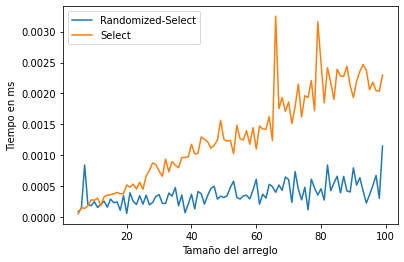

In [138]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

def Partition(a, p, r):

    x = a[r]
    i = p - 1
    for j in range(p, r):
        if a[j] <= x:
            i = i + 1
            
            a[i], a[j] = a[j], a[i]

    a[i+1], a[r] = a[r], a[i+1]

    return i + 1

def RandomizedPartition(a, p, r):
    
    i = np.random.randint(p, r)
    a[i], a[p] = a[p], a[i]
    return Partition(a, p, r)

def Randomizedselect(a, p, r, i):
    if p == r:
        return a[p]
    q = RandomizedPartition(a, p, r)
    
    k = q - p +1
    if i == k:
        return a[q]
    elif i < k:
        return Randomizedselect(a, p, q - 1, i)
    else:
        return Randomizedselect(a, q + 1, r, i - k)


x=[]; y=[]
y1=[]

for n in range(5,100):

  a = random.sample(range(1, 100), n)
  cont = [0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import Randomizedselect", stmt=f"Randomizedselect({a},{0},{n-1},{3})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import select", stmt=f"select({a},{3},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Randomized-Select", "Select"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

**Resultado:** 
El algoritmo **Select** se diferencia de Randomized-select en la **selección del pivote para realizar la partición.** Y su principal diferencia es que divide el conjunto de **n** elementos en (n/5) **siempre**, sin importar el tamaño de este, es por eso, que apesar de tener la misma funcionalidad, Randomized-select es mucho más eficiente, debido que se mantiene constante apesar que el tamaño vaya aumentando.

Sin embargo, cuando el arreglo tiene tamaños entre 5 y aprox 13-15, se puede observar que Select funciona de una manera mejor que el otro algoritmo.